# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [71]:
%matplotlib inline
%pprint off

from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.io import imread, imshow
from skimage.morphology import disk
from skimage.transform import rescale
from skimage.morphology import binary_closing, binary_opening, disk, erosion, binary_dilation, binary_erosion
from skimage.measure import label, regionprops
from skimage.filters import threshold_otsu
from skimage.transform import rescale
from skimage.draw import circle_perimeter
import numpy as np

Pretty printing has been turned ON


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

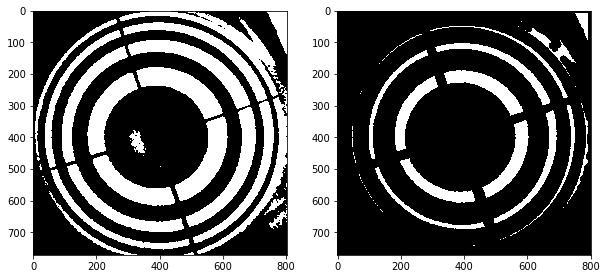

In [42]:
#import of the lena's image from the devices
img_path = './images/'
img_name = 'FindingContours.png'
contour_grey_path = img_path.__add__(img_name)
Contour_grey = io.imread(contour_grey_path)
selam=disk(10)
Erosion =binary_erosion(Contour_grey,selam)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax0, ax1 = axes.ravel()
ax0.imshow(Contour_grey,cmap='gray')
ax1.imshow(Erosion,cmap='gray')


** Q.1.2 Dilation **

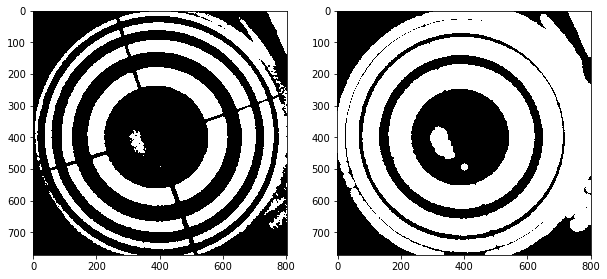

In [43]:
Dilation =binary_dilation(Contour_grey,selam)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax0, ax1 = axes.ravel()
ax0.imshow(Contour_grey,cmap='gray')
ax1.imshow(Dilation,cmap='gray')

** Q.1.3 Opening **

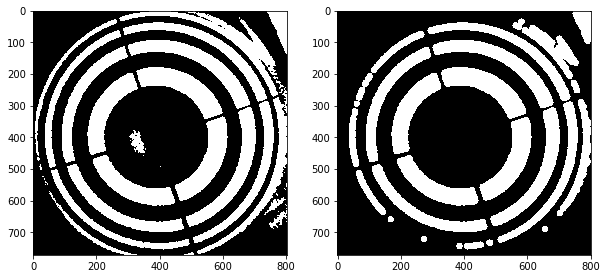

In [44]:
binaryopening =binary_opening(Contour_grey,selam)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax0, ax1 = axes.ravel()
ax0.imshow(Contour_grey,cmap='gray')
ax1.imshow(binaryopening,cmap='gray')

** Q.1.4 Closing**

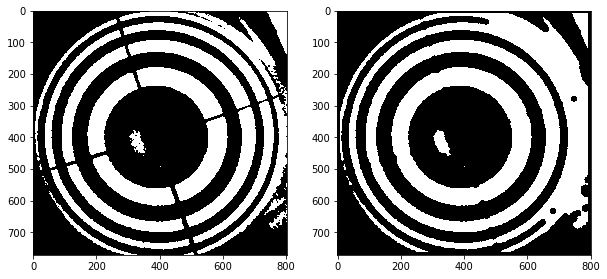

In [45]:
binaryclosing =binary_closing(Contour_grey,selam)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax0, ax1 = axes.ravel()
ax0.imshow(Contour_grey,cmap='gray')
ax1.imshow(binaryclosing,cmap='gray')

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

C:\Users\MKH\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


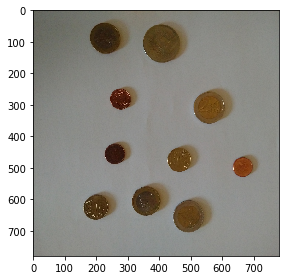

In [47]:
CoinsImage = imread('./images/coins.jpg')
CoinsImage= img_as_ubyte(CoinsImage)
ScaledCoins= rescale(CoinsImage,1.0 / 4.0)
imshow(ScaledCoins,cmap='gray')

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

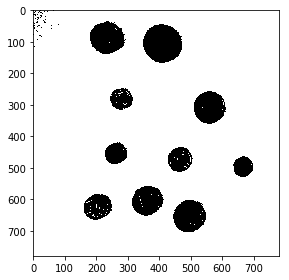

In [51]:
GrayCoins= rgb2gray(ScaledCoins)
threshold_coins= threshold_otsu(GrayCoins,nbins=256)
coins_Otsu = GrayCoins > threshold_coins
imshow(coins_Otsu)

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

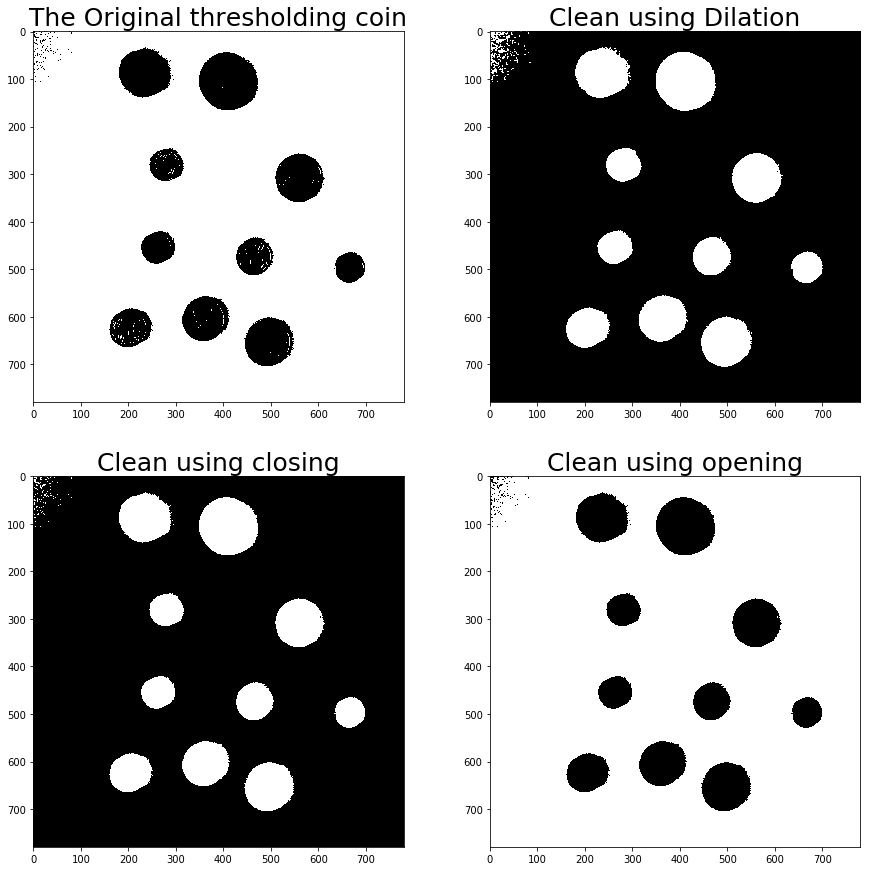

In [82]:
selam=disk(1)
Dilation_coins_Otsu =binary_dilation(coins_Otsu,selam)
binaryclosing =binary_closing(coins_Otsu,selam)
coins_Otsu=np.invert(coins_Otsu)
binaryopening =binary_opening(coins_Otsu,selam)
binaryopening=np.invert(binaryopening)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
ax0, ax1,ax2,ax3 = axes.ravel()
ax0.imshow(coins_Otsu,cmap='gray')
ax1.imshow(Dilation_coins_Otsu,cmap='gray')
ax2.imshow(binaryclosing,cmap='gray')
ax3.imshow((1-binaryopening),cmap='gray')
ax0.set_title('The Original thresholding coin',fontsize=25)
ax1.set_title('Clean using Dilation',fontsize=25)
ax2.set_title('Clean using closing',fontsize=25)
ax3.set_title('Clean using opening',fontsize=25)

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


C:\Users\MKH\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


14
New number of regions =10


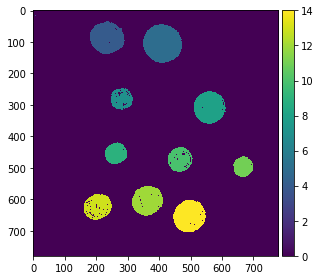

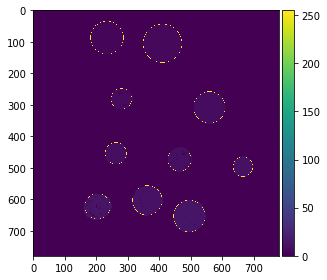

In [64]:
ImageLabels, NumRegions = label(binaryclosing, background=1, return_num=True)
plt.figure()
imshow(ImageLabels)
print (NumRegions)

Img_properties = regionprops(ImageLabels)
a = 0
for i, regions in enumerate(Img_properties):
    r = regions
    if r.filled_area < 2660 or r.filled_area > 100000:
        continue
    a += 1
    point = r.centroid
    radius = r.equivalent_diameter / 2
    circle = circle_perimeter(int(point[0]), int(point[1]), int(radius))
    ImageLabels[circle[0], circle[1]] = 255

print('New number of regions =' + str(a))
plt.figure()
imshow(ImageLabels)

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

In [70]:
coins_Otsu.dtype

dtype('bool')